### **Introduction to Machine Learning**

#### **Machine Learning (ML)** is a field of artificial intelligence (AI) that focuses on developing algorithms and models capable of learning patterns and making predictions or decisions based on data without being explicitly programmed. 

In essence, ML enables computers to learn from data and improve their performance over time. Instead of relying on explicit instructions, ML algorithms learn from examples and experience, allowing them to adapt to new data and situations.

There are three main types of machine learning:

### **1. Supervised Learning** 
In supervised learning, the algorithm is trained on labeled data, where each example is paired with the correct answer or output. The algorithm learns from these labeled examples to make predictions or classifications on unseen data.

### **2. Unsupervised Learning** 
Unsupervised learning involves training algorithms on unlabeled data, where the algorithm's goal is to discover hidden patterns or structures within the data. Without predefined output labels, the algorithm explores the data to find meaningful insights.

### **3. Reinforcement Learning** 
Reinforcement learning is a type of learning where an agent learns to make decisions by interacting with an environment. The agent receives feedback in the form of rewards or penalties based on its actions, allowing it to learn the optimal behavior over time.

Machine learning algorithms are diverse and tailored to different tasks and data types. Some common machine learning algorithms include linear regression, logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks.

Overall, machine learning plays a crucial role in various domains, including healthcare, finance, marketing, and more. By leveraging the power of data and algorithms, machine learning enables intelligent systems to automate tasks, extract valuable insights, and make informed decisions.


# Machine Learning Model: An Overview

A machine learning model is a mathematical representation or structure learned by a machine learning algorithm to perform a specific task on data. It is typically used to extract features from data, identify relationships, and ultimately produce a specific outcome.

For example, a classification model assigns a data point to a specific class, while a regression model makes a value prediction. The model learns from examples in the training dataset and can then be applied to new data.

A machine learning model is often a mathematical formulation or structure that represents how an algorithm learns to perform a particular task. This structure is trained and adjusted based on performance metrics, typically derived from the training data, to evaluate how well the model performs in a specific task.


# Model selection based on diabetes data

## About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).
Dataset link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

#Lets start.
First, we need to import some libraries.

In [470]:
import numpy as np  # NumPy for numerical computing
import pandas as pd  # Pandas for data manipulation and analysis

# Data visualization libraries
import seaborn as sns  
import matplotlib.pyplot as plt  

# Machine Learning Classifiers/Models
from catboost import CatBoostClassifier  # CatBoost Classifier
from lightgbm import LGBMClassifier  # LightGBM Classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Gradient Boosting and Random Forest Classifiers
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier

# Data preprocessing libraries
from sklearn.preprocessing import RobustScaler  # RobustScaler for feature scaling
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical variables

# Evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve  # Various evaluation metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV  # Train/test split, cross-validation, grid search

import warnings
warnings.simplefilter(action='ignore', category=Warning)


This chunk of code is needed for pandas settings.

In [471]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Exploratory Data Analysis (EDA) Section
Exploratory Data Analysis (EDA) is a crucial step in data analysis where datasets are visually and statistically analyzed to uncover patterns, trends, and relationships within the data. Through techniques like data visualization and summary statistics, EDA aims to understand the structure of the data, identify potential outliers or missing values, and gain insights that inform further analysis or modeling decisions.

Let's continue on EDA section with reading .csv file.

In [472]:
df = pd.read_csv("diabetes.csv")

To have some information on csv file, we are going to use those methods.

In [473]:
# Print the first few rows of the dataframe (default is 5)
print(df.head())

# Print the last few rows of the dataframe (default is 5) (For example, we go with 10)
print(df.tail(10))

# Print the number of rows and columns in the dataframe
print(df.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
758            1      106             76              0        0 37.500                     0.197   26        0
759            6      190             92              0        0 35.500                     0.278   66        1
760 

The df.info() command provides a quick overview of the structure of data frames. Indicates how many rows and columns the data frame contains. Specifies which columns are of which data type. Shows how many missing (NaN) values are in each column. Specifies how much memory the data frame uses.

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Now we are going to explore more details on "Outcome" colomn.

Counting the occurrences of each unique value in the "Outcome" column and printing them

In [475]:
print(df["Outcome"].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


To display same information as  percentage distribution, we are going to divide the count of each value by the total number of rows.

In [476]:
print(100*df["Outcome"].value_counts()/len(df))

Outcome
0   65.104
1   34.896
Name: count, dtype: float64


To display descriptive statistics like mean, standard deviation, etc., in a transposed form for better readability, we are going to use .describe().T method. ".T" means we will transpose the data., for better readability.

In [477]:
print(df.describe().T)

                           count    mean     std    min    25%     50%     75%     max
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   6.000  17.000
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000 140.250 199.000
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000  80.000 122.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000  32.000  99.000
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500 127.250 846.000
BMI                      768.000  31.993   7.884  0.000 27.300  32.000  36.600  67.100
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   0.626   2.420
Age                      768.000  33.241  11.760 21.000 24.000  29.000  41.000  81.000
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   1.000   1.000


Finally, to visualize all data we explored, we are going to use Seaborn and Plot libraries.

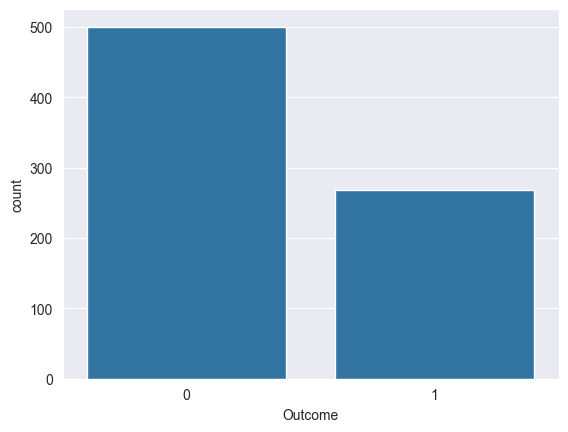

In [478]:
sns.countplot(x="Outcome", data=df)
plt.show()

The code snippet below defines a function plot_numerical_col to generate histograms for numerical columns in a DataFrame. It then selects all columns in the DataFrame except those related to "Outcome" and plots histograms for each selected column using the defined function. This allows for a concise visual analysis of the distribution of numerical data across the DataFrame, excluding "Outcome" columns.

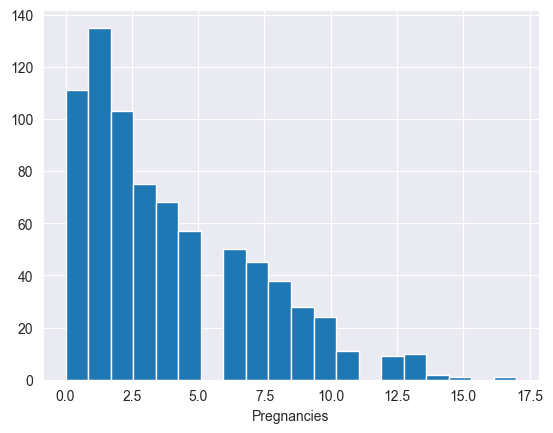

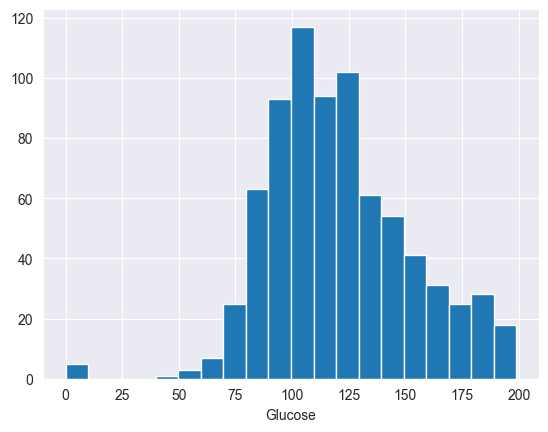

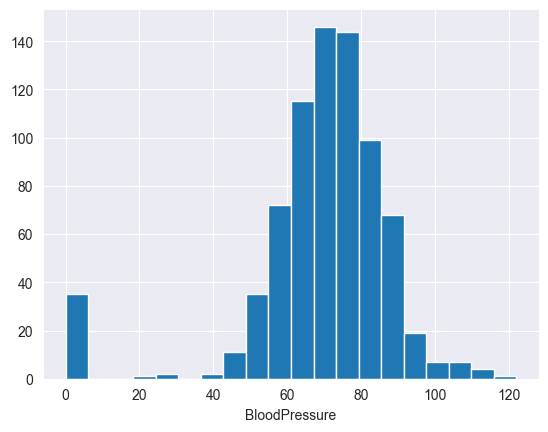

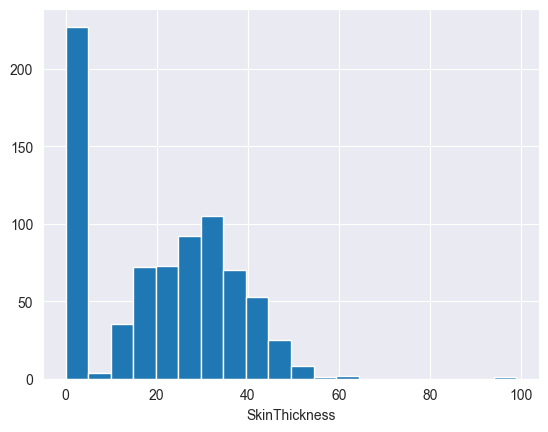

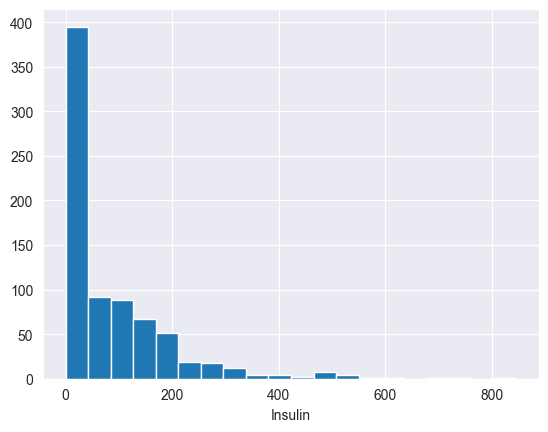

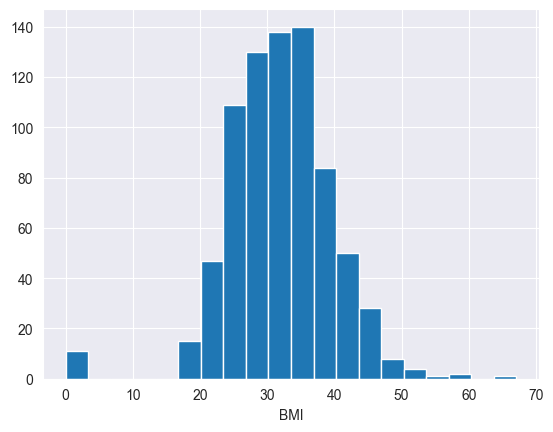

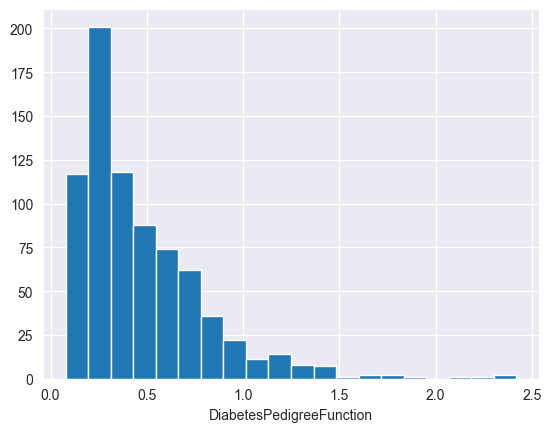

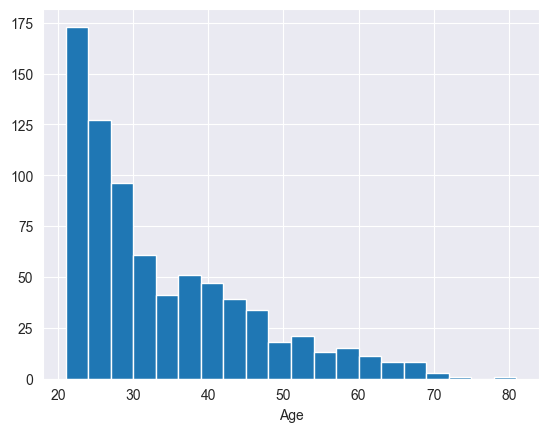

In [479]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


cols = [col for col in df.columns if "Outcome" not in col]

for col in cols:
    plot_numerical_col(df, col)

# Data Preprocessing Section

Data preprocessing is the initial step in data analysis, involving the transformation of raw data into a clean and organized format suitable for further analysis. This process typically includes tasks such as handling missing values, removing duplicates, scaling features, encoding categorical variables, and feature engineering. Data preprocessing aims to improve data quality, enhance model performance, and ensure that the data meets the requirements of the analytical techniques to be applied. By addressing inconsistencies and preparing the data appropriately, data preprocessing facilitates more accurate and meaningful insights during subsequent analysis tasks, such as machine learning modeling or statistical analysis.

First, we are going to take a look if there is any missing data.

"df.isnull().sum()" counts the total number of missing values in each column of a DataFrame. It returns a series where each column name corresponds to its count of missing values.

In [480]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Belong to results, there is no missing data on our dataset. 

So, we are going to check and replace our outliers. Outliers basically means noises of our dataset. Those noises do not represenst main number patters of our datas. For example, pragnancies datas can not be more than 9 month or lower than 0 month. Thant means our pragnacies range is 0-9. We should exclude the datas not in our range. To exclude those outlier noises, we are going to implement two function named "check_outlier" and "outlier_tresholds".

The first function, outlier_thresholds, calculates lower and upper limits for identifying outliers in a numerical column of a DataFrame based on quartiles and interquartile range. The second function, check_outlier, checks for outliers in a column using the limits obtained from the first function, returning True if any outliers are found, and False otherwise.

In [481]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in cols:
    # Look for every column
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


According to results, Only "Insulin" column has an outlier.

Then, let's replace the outliers in the Insulin column with our range limits which will be calculated in the function below. If outlier variable higher than up_limit, replace it with up_limit. Else if outlier variable lower than low_limit, replace it with low_limit.

In [482]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Insulin")

Let's check if the outliers are removed.

In [483]:
for col in cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


Obviously, outlier datas removed. So now we can continue with data scaling.

**Data scaling** is a preprocessing technique used in machine learning to standardize or normalize the features of a dataset. It involves transforming the values of numerical features to a similar scale to prevent features with larger magnitudes from dominating those with smaller magnitudes during model training. Scaling ensures that all features contribute equally to the model's learning process and improves the convergence rate of many optimization algorithms. Common scaling methods include StandardScaler, MinMaxScaler, and RobustScaler, each applying different transformations to bring the feature values within a specific range or distribution. Overall, data scaling enhances the performance and stability of machine learning models by making them more robust to the differences in feature magnitudes.


This code snippet applies the RobustScaler transformation to each numerical column (col) in the DataFrame (df). It scales the values within each column to a similar range, making them more comparable and suitable for machine learning algorithms.



In [484]:
for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

Now we can ensure if the scaler works fine.

In [485]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1
5,0.400,-0.024,0.111,-0.719,-0.240,-0.688,-0.448,0.059,0
6,0.000,-0.945,-1.222,0.281,0.452,-0.108,-0.325,-0.176,1
7,1.400,-0.048,-4.000,-0.719,-0.240,0.355,-0.624,0.000,0
8,-0.200,1.939,-0.111,0.688,4.028,-0.161,-0.561,1.412,1
9,1.000,0.194,1.333,-0.719,-0.240,-3.441,-0.367,1.471,1


Everything looks fine, now its time to switch to next section.

# Model Selection and Prediction Section

In this section we are going to explore and select which machine learning model best for our dataset without any optimization. We are going to use **"Cross Validation"** method to inspect model performance.

First, we should split "Outcome" and the rest.

In [486]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [487]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [488]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235


Let's take a look for models. To initialize models, run the code snipper below.

In [489]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

models = {
    "CART": DecisionTreeClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False),
    "GBM": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False)
}

Now let's measure accuracy and precision for our models.

Accuracy and precision is most used criteria for Selection projects. So we are going with them.

Let's take a look.

In [490]:
# Define scoring metrics
scoring_metrics = ["accuracy", "precision"]

# Iterate over each model
for model_name, model in models.items():
    # Initialize an empty dictionary to store cross-validation results
    cv_results = {}

    # Iterate over each scoring metric
    for metric in scoring_metrics:
        # Perform cross-validation for the current model and metric
        cv_results[metric] = cross_validate(model, X, y, cv=10, scoring={metric: metric}, error_score='raise')
        # Calculate the mean score for the current metric
        mean_score = cv_results[metric]['test_' + metric].mean()
        # Print the model name and the mean score for the current metric
        print(f"{model_name} {metric.capitalize()} score: {mean_score}")

CART Accuracy score: 0.7018284347231716
CART Precision score: 0.5765596458139561
CatBoost Accuracy score: 0.7656527682843473
CatBoost Precision score: 0.6956980676328502
GBM Accuracy score: 0.7604066985645933
GBM Precision score: 0.6870570429071179
LightGBM Accuracy score: 0.7487354750512646
LightGBM Precision score: 0.6582283421162878
Random Forest Accuracy score: 0.7577751196172249
Random Forest Precision score: 0.6920056644610024
XGBoost Accuracy score: 0.7434723171565276
XGBoost Precision score: 0.6385130380486786


Looks like **CatBoost** model is best for us. So we continue with CatBoost.

# Hyperparameter Optimization Section

**Hyperparameter optimization** is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are external to the model and cannot be directly estimated from the data. They control the behavior of the learning algorithm and can significantly impact the performance of the model.

Although RandomSearchCV() allows for exploration of a broad parameter space to extract a subset, GridSearchCV() exhaustively tries all combinations within this subset to identify optimal parameters. However, in this scenario, we'll exclusively utilize GridSearchCV().

Our CatBoost model parameter example is this:


In [491]:
from sklearn.model_selection import GridSearchCV

catboost_params = {"iterations": [100, 200],
                   "learning_rate": [0.01, 0.1],
                   "depth": [2, 3, 8]}

Fitting 10 folds for each of 36 candidates, totalling 360 fits.

Let's apply them.

In [492]:
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Insert the best parameter into our model and run.

In [493]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=42).fit(X, y)

Let's see which parameters is the best for our model in our example parameter list. We are going to test our model for "Accuracy".

In [494]:
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy"])
print("accuracy score: ", cv_results["test_accuracy"].mean())

accuracy score:  0.7669172932330828


# Model Rating Section

In this section, we will examine the success of our optimized CatBoost model. Then we will create the **Confusion matrix**. We will examine **error metrics**.

Let's check our model for all evaluation criterias.

In [495]:
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

f1 score:  0.6406583288662209
precision score:  0.6966536545741637
recall score:  0.6007122507122508
accuracy score:  0.7669172932330828
roc_auc score:  0.8334444444444443


Now let's perform the prediction process and create a **Confusion matrix**.

The function blow, plot_confusion_matrix, visualizes the relationship between the actual labels (y) and the predicted labels (y_predict) using a heatmap representation of the confusion matrix. It calculates the accuracy score between the actual and predicted labels and displays it on top of the confusion matrix. This visualization helps understand how well the model performs in classifying each label and which classes are misclassified.

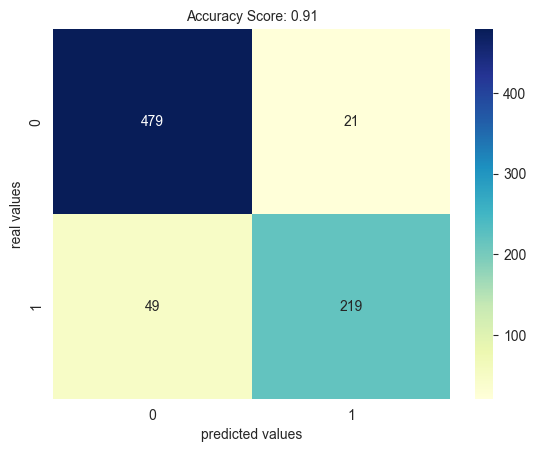

In [496]:
# (X) parameter coming from X = df.drop(["Outcome"], axis=1)
# So it is our datafile without "Outcome" column.
y_predict = catboost_final.predict(X)

def plot_confucion_matrix(y, y_predict):
    acc = round(accuracy_score(y,y_predict), 2)
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'YlGnBu')
    plt.xlabel('predicted values')
    plt.ylabel('real values')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confucion_matrix(y, y_predict)

Finally, let's calculate the "Mean Absolute Error (MAE)", "Mean Squared Error (MSE)" and "Root Mean Squared Error (RMSE)" metrics and then examine the results.

In [497]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y, y_predict)
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  0.09114583333333333
MAE:  0.09114583333333333
RMSE:  0.30190368221228
